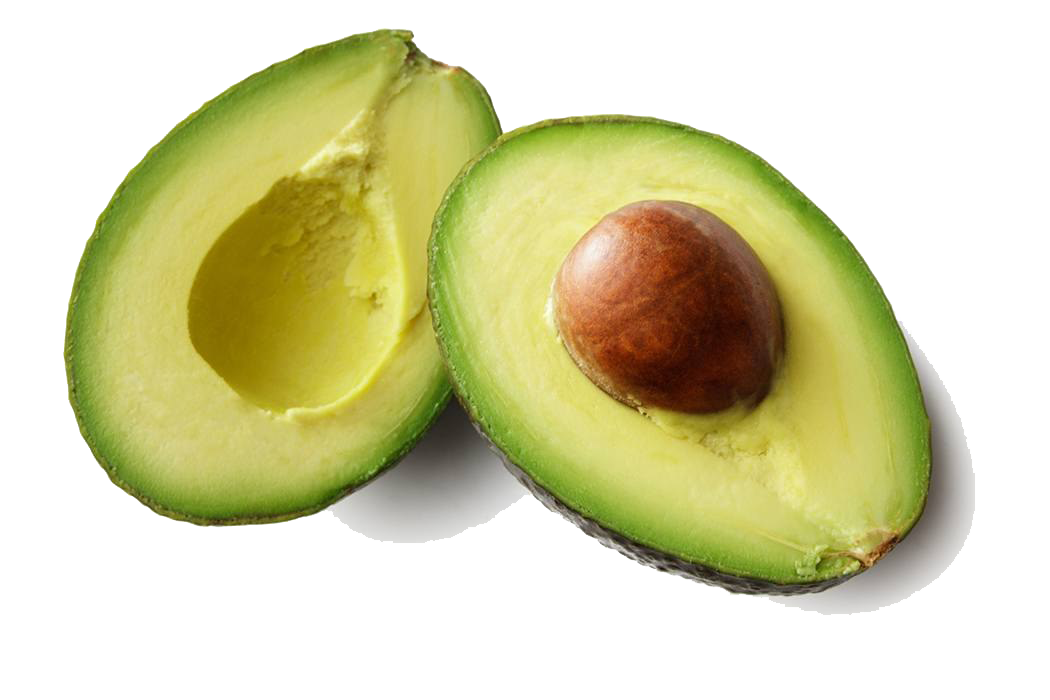

# AVOCADO PROJECT

In [230]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [231]:
#load data
av=pd.read_csv('avocado_dataset.csv')
av

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [232]:
av.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [233]:
av['type'].value_counts()

conventional    1517
Name: type, dtype: int64

as you see there is only one type of conventional so we can drop that

In [234]:
# drop unnamed: 0 because they are no use
av=av.drop(columns=['Unnamed: 0','type'])

In [235]:
av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


In [236]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  year          1517 non-null   int64  
 11  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 142.3+ KB


In [237]:
#now lets make date into datetime64 type
av['Date']=pd.to_datetime(av['Date'])
av['Month']=av['Date'].apply(lambda x:x.month)
av['Day']=av['Date'].apply(lambda x:x.day)

In [238]:
av.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

In [239]:
av.shape

(1517, 14)

In [240]:
av.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


-> AS YOU SEE THE MEAN AND MEDIAN THERE ARE LARGE DIFFERENCE IN PLU 4770

-> THERE IS LARGER DIFFERENCE BETWEEN 75% AND MAX IN XLARGE BAGS

In [241]:
av.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
Month           0
Day             0
dtype: int64

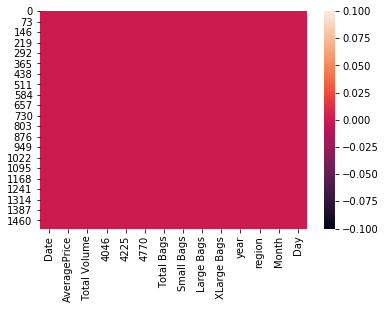

In [242]:
sns.heatmap(av.isnull())
plt.show()

AS YOU SEE THERE ARE NO MISSING VALUES

In [243]:
#lets check correlation values
av_cor=av.corr()
av_cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144,0.029744


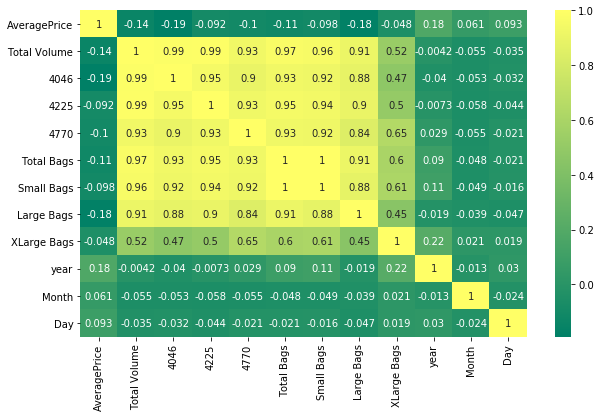

In [244]:
#we can correlation in the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(av_cor,cmap='summer',annot=True)
plt.show()

-> HERE YRELLOW SHADES ARE HIGHLY CORRELATED
-> WHERE HAS GREEN SHOWS LOW CORRELATION
->THE AVERAGE PRICE IS NEGATIVELY CORRELATED TO PLU4046

In [245]:
av.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

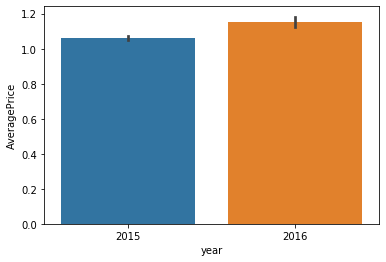

In [246]:
#lets see average price in the two years
sns.barplot(y='AveragePrice',x='year',data=av)
plt.show()

In [247]:
# here the average prices of avocado are higher in 2016 compare to 2015

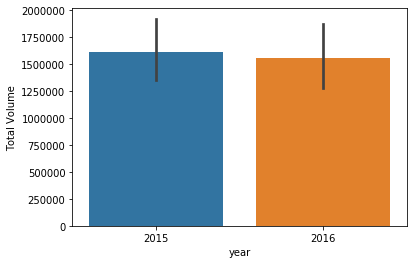

In [248]:
# total volume to years
sns.barplot(x='year',y='Total Volume',data=av)
plt.show()

In [249]:
# total avocados sold higher in 2015 compare to 2016

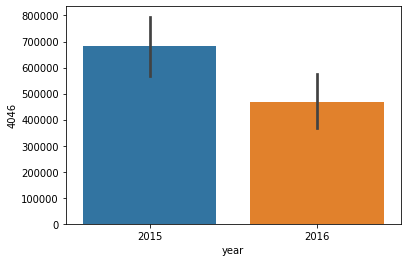

In [250]:
#total number of plu4046 avocados sold
sns.barplot(x='year',y='4046',data=av)
plt.show()

In [251]:
# PLU4046 avocados sold higher in 2015

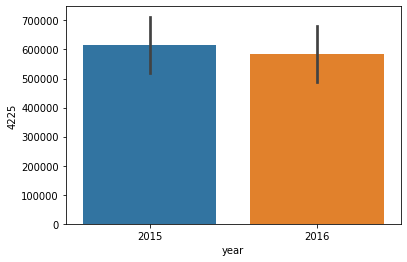

In [252]:
sns.barplot(x='year',y='4225',data=av)
plt.show()

In [253]:
# PLU4225 avocado sold higher in 2015

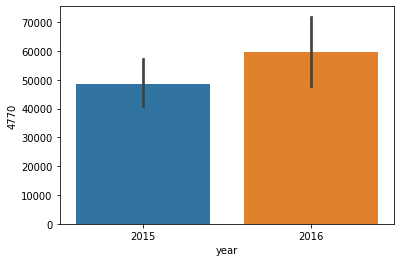

In [254]:
sns.barplot(x='year',y='4770',data=av)
plt.show()

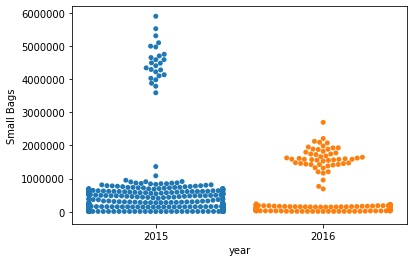

In [255]:
# types of bags used in 2 years
sns.swarmplot(x='year',y='Small Bags',data=av)

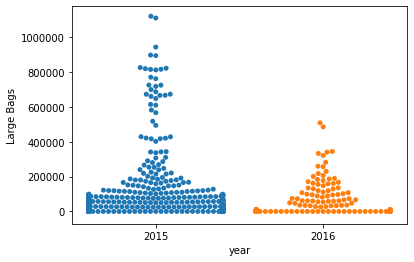

In [256]:
sns.swarmplot(x='year',y='Large Bags',data=av)

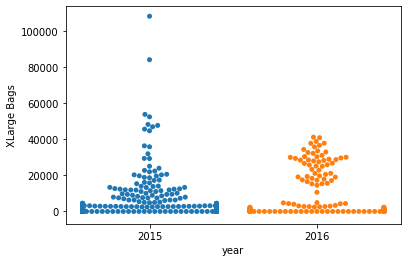

In [257]:
sns.swarmplot(x='year',y='XLarge Bags',data=av)

In [258]:
#PLU4770 avocado sold higher in 2015

In [259]:
# grouping different types of production as per the date
datewise=av.groupby(['Date']).agg({'AveragePrice':'sum','Total Volume':'sum','4046':'sum','4225':'sum','4770':'sum'})
datewise['Days Since']=datewise.index-datewise.index.min()

In [260]:
print("Basic Information")
print("Totol number of Avocados Selling Citys In United states: ",len(av["region"].unique()))
print("Total number of Total Volume around the US: ",datewise["Total Volume"].iloc[-1])
print("Total number of Average Price around the US: ",datewise["AveragePrice"].iloc[-1])
print("Total number of PLU4046 around the US: ",datewise["4046"].iloc[-1])
print("Total number of PLU4225 around the US: ",datewise["4225"].iloc[-1])
print("Total number of PLU4770 around the US: ",datewise["4770"].iloc[-1])

Basic Information
Totol number of Avocados Selling Citys In United states:  51
Total number of Total Volume around the US:  6265877.34
Total number of Average Price around the US:  7.43
Total number of PLU4046 around the US:  1651574.04
Total number of PLU4225 around the US:  2715377.1999999997
Total number of PLU4770 around the US:  118656.28


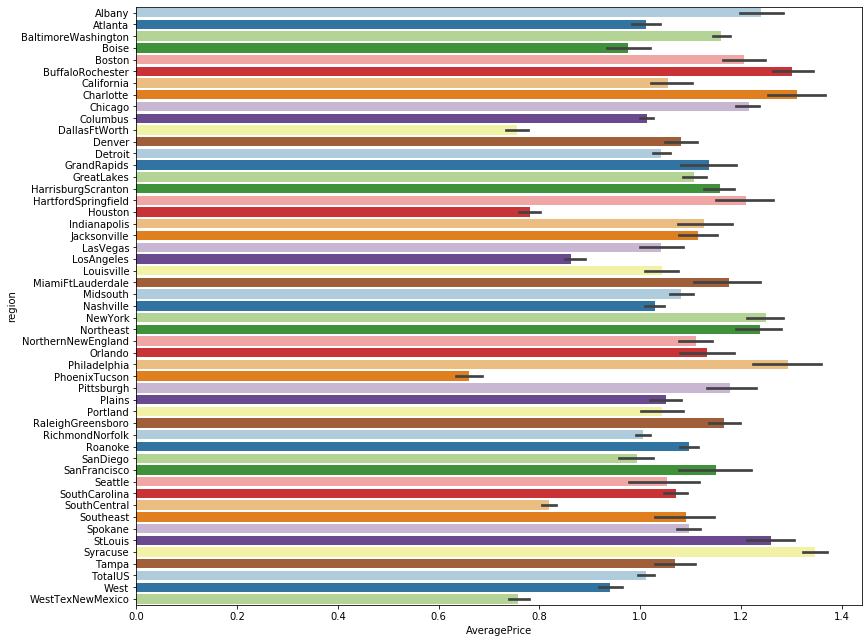

In [261]:
plt.figure(figsize=(13,11))
sns.barplot(y='region',x='AveragePrice',data=av,palette='Paired')
plt.show()

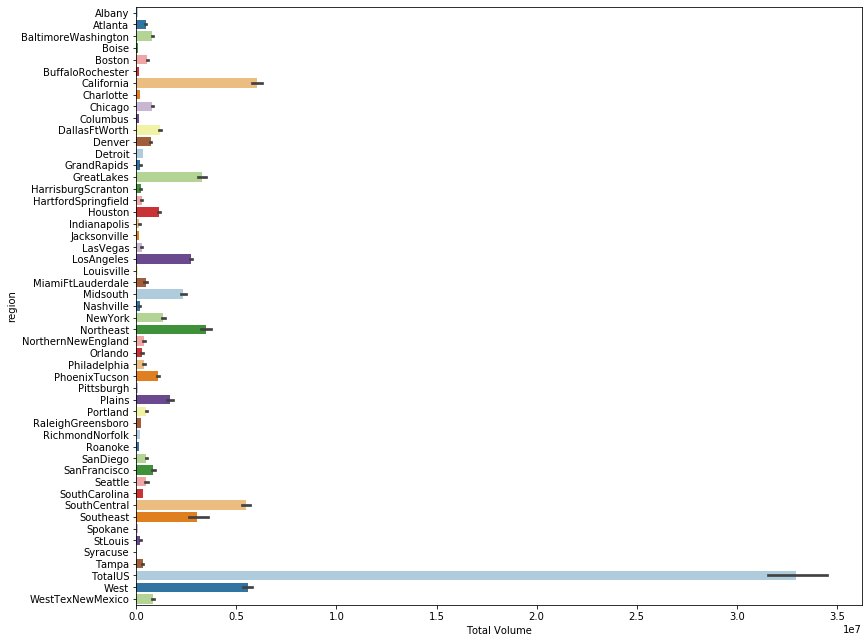

In [262]:
plt.figure(figsize=(13,11))
sns.barplot(y='region',x='Total Volume',data=av,palette='Paired')
plt.show()

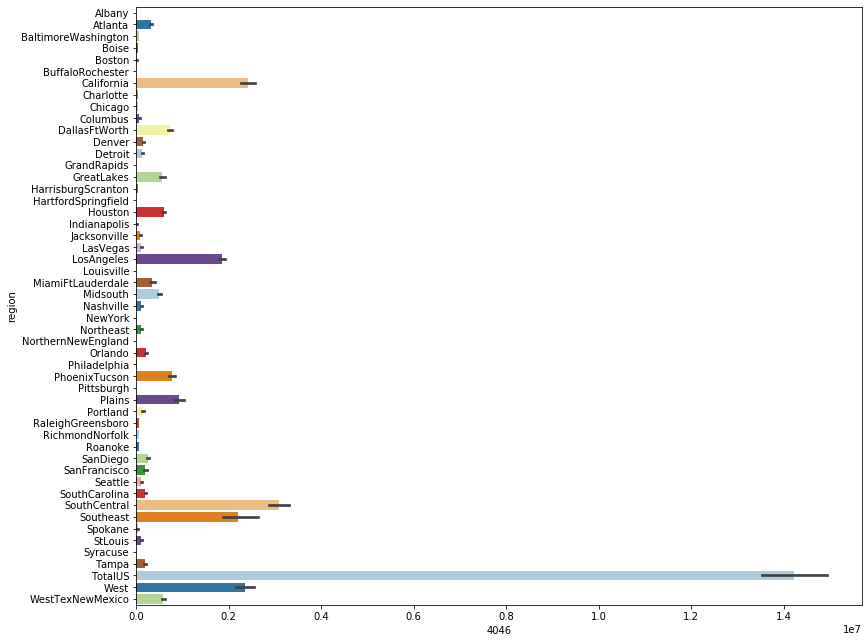

In [263]:
plt.figure(figsize=(13,11))
sns.barplot(x='4046',y='region',data=av,palette='Paired')
plt.show()

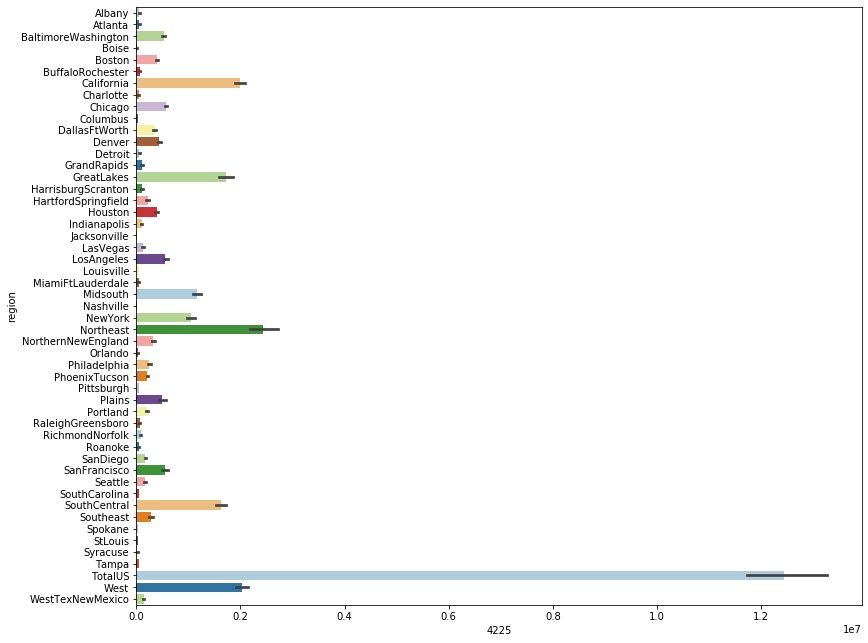

In [264]:
plt.figure(figsize=(13,11))
sns.barplot(x='4225',y='region',data=av,palette='Paired')
plt.show()

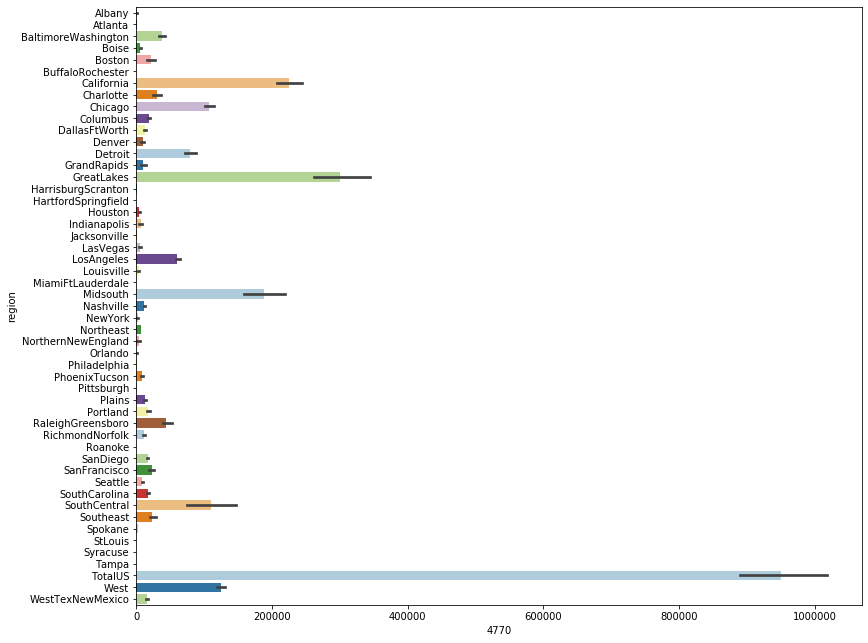

In [265]:
plt.figure(figsize=(13,11))
sns.barplot(x='4770',y='region',data=av,palette='Paired')
plt.show()

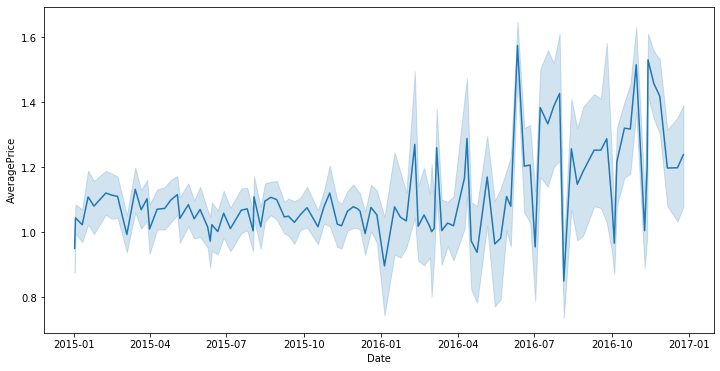

In [266]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='AveragePrice',data=av)

TO DETECT THE OUTLIERS

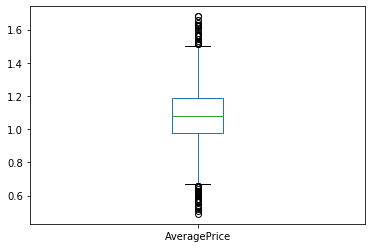

In [267]:
av['AveragePrice'].plot.box()

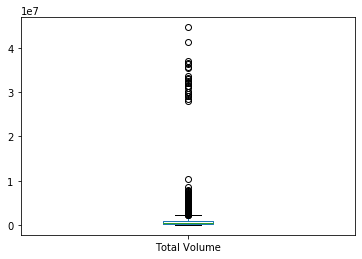

In [268]:
av['Total Volume'].plot.box()

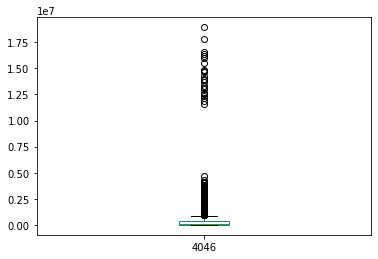

In [269]:
av['4046'].plot.box()

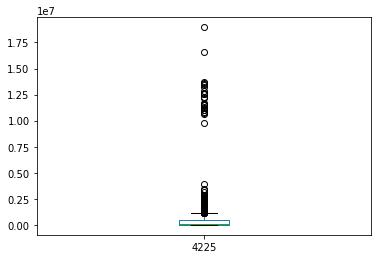

In [270]:
av['4225'].plot.box()

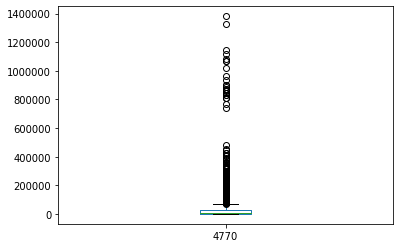

In [271]:
av['4770'].plot.box()

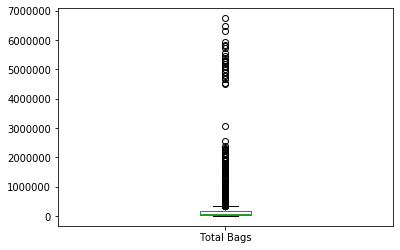

In [272]:
av['Total Bags'].plot.box()

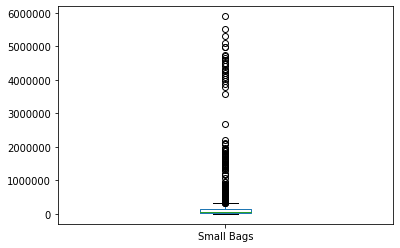

In [273]:
av['Small Bags'].plot.box()

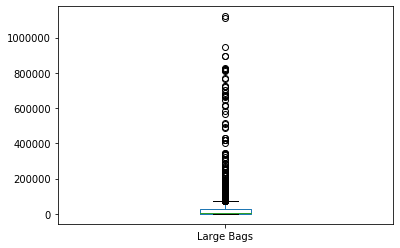

In [274]:
av['Large Bags'].plot.box()

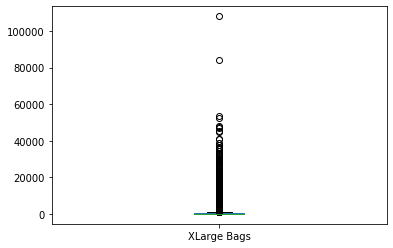

In [275]:
av['XLarge Bags'].plot.box()

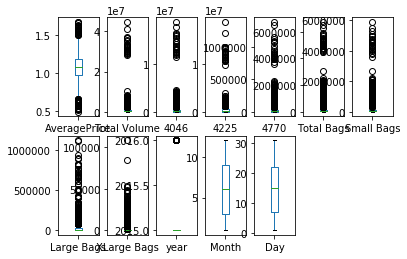

In [276]:
av.plot(kind='box',subplots=True,layout=(2,7))
plt.show()

# TO CHECK DISTRIBUTION OF SKEWNESS

In [277]:
av.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

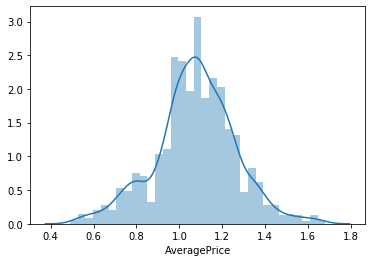

In [278]:
sns.distplot(av['AveragePrice'])

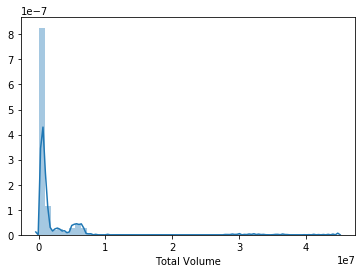

In [279]:
sns.distplot(av['Total Volume'])

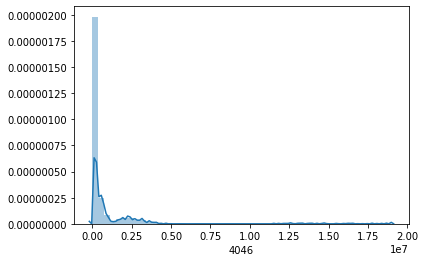

In [280]:
sns.distplot(av['4046'])

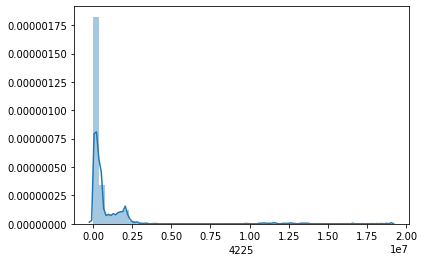

In [281]:
sns.distplot(av['4225'])

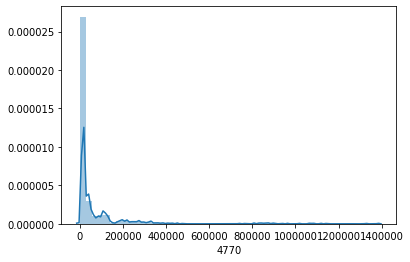

In [282]:
sns.distplot(av['4770'])

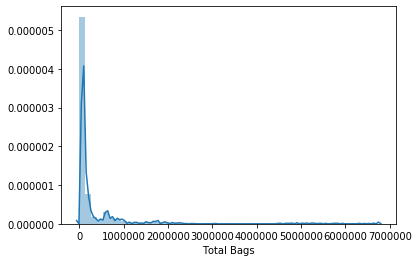

In [283]:
sns.distplot(av['Total Bags'])

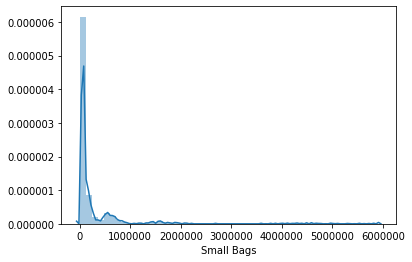

In [284]:
sns.distplot(av['Small Bags'])

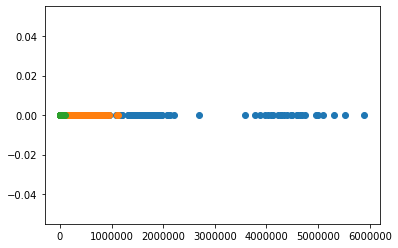

In [285]:
plt.plot(av['Small Bags'],np.zeros_like(av['Small Bags']),'o')
plt.plot(av['Large Bags'],np.zeros_like(av['Large Bags']),'o')
plt.plot(av['XLarge Bags'],np.zeros_like(av['XLarge Bags']),'o')
plt.show()

In [286]:
#green=small bags,yellow=large bags,blue=xlarge bags

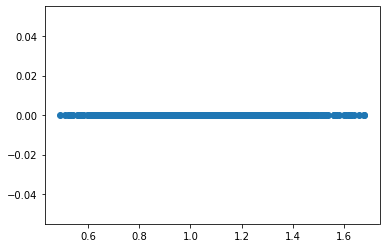

In [287]:
plt.plot(av['AveragePrice'],np.zeros_like(av['AveragePrice']),'o')
plt.show()

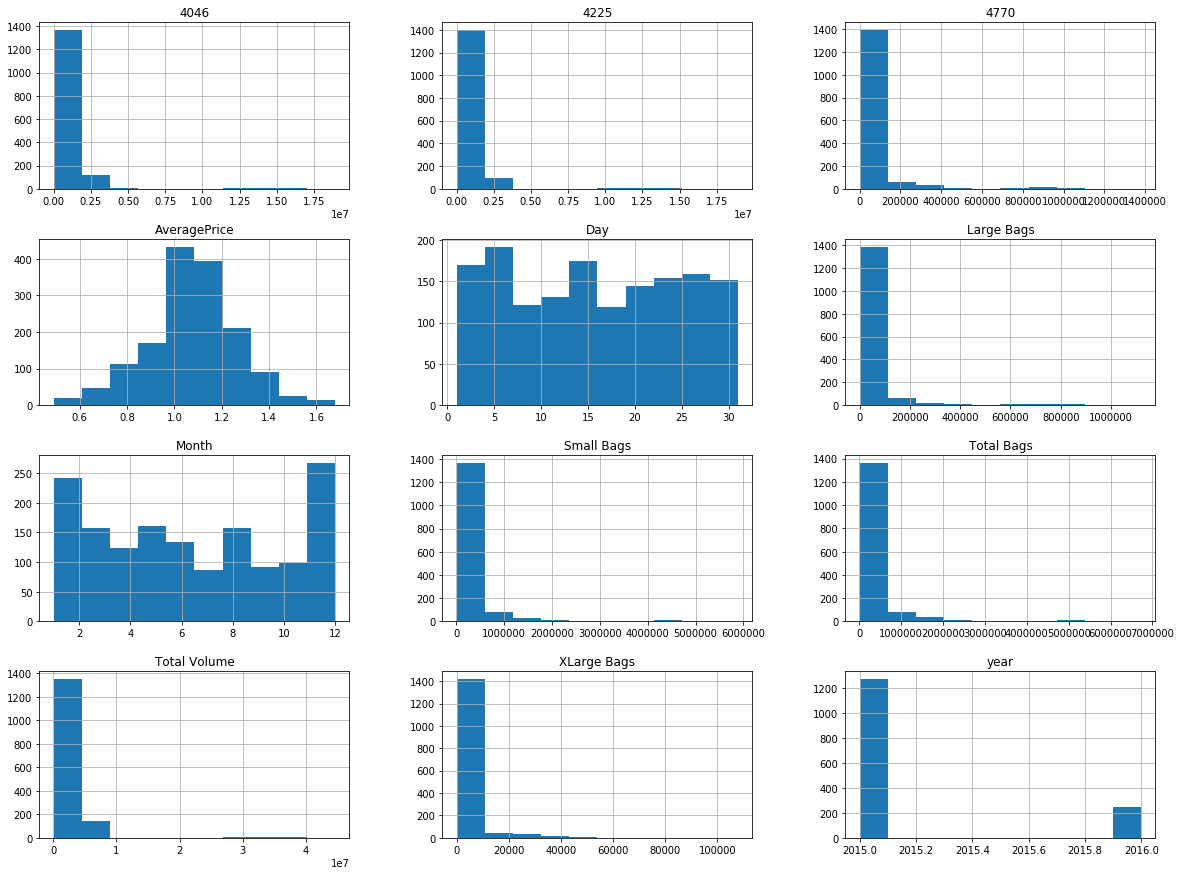

In [288]:
av.hist(figsize=(20,15))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


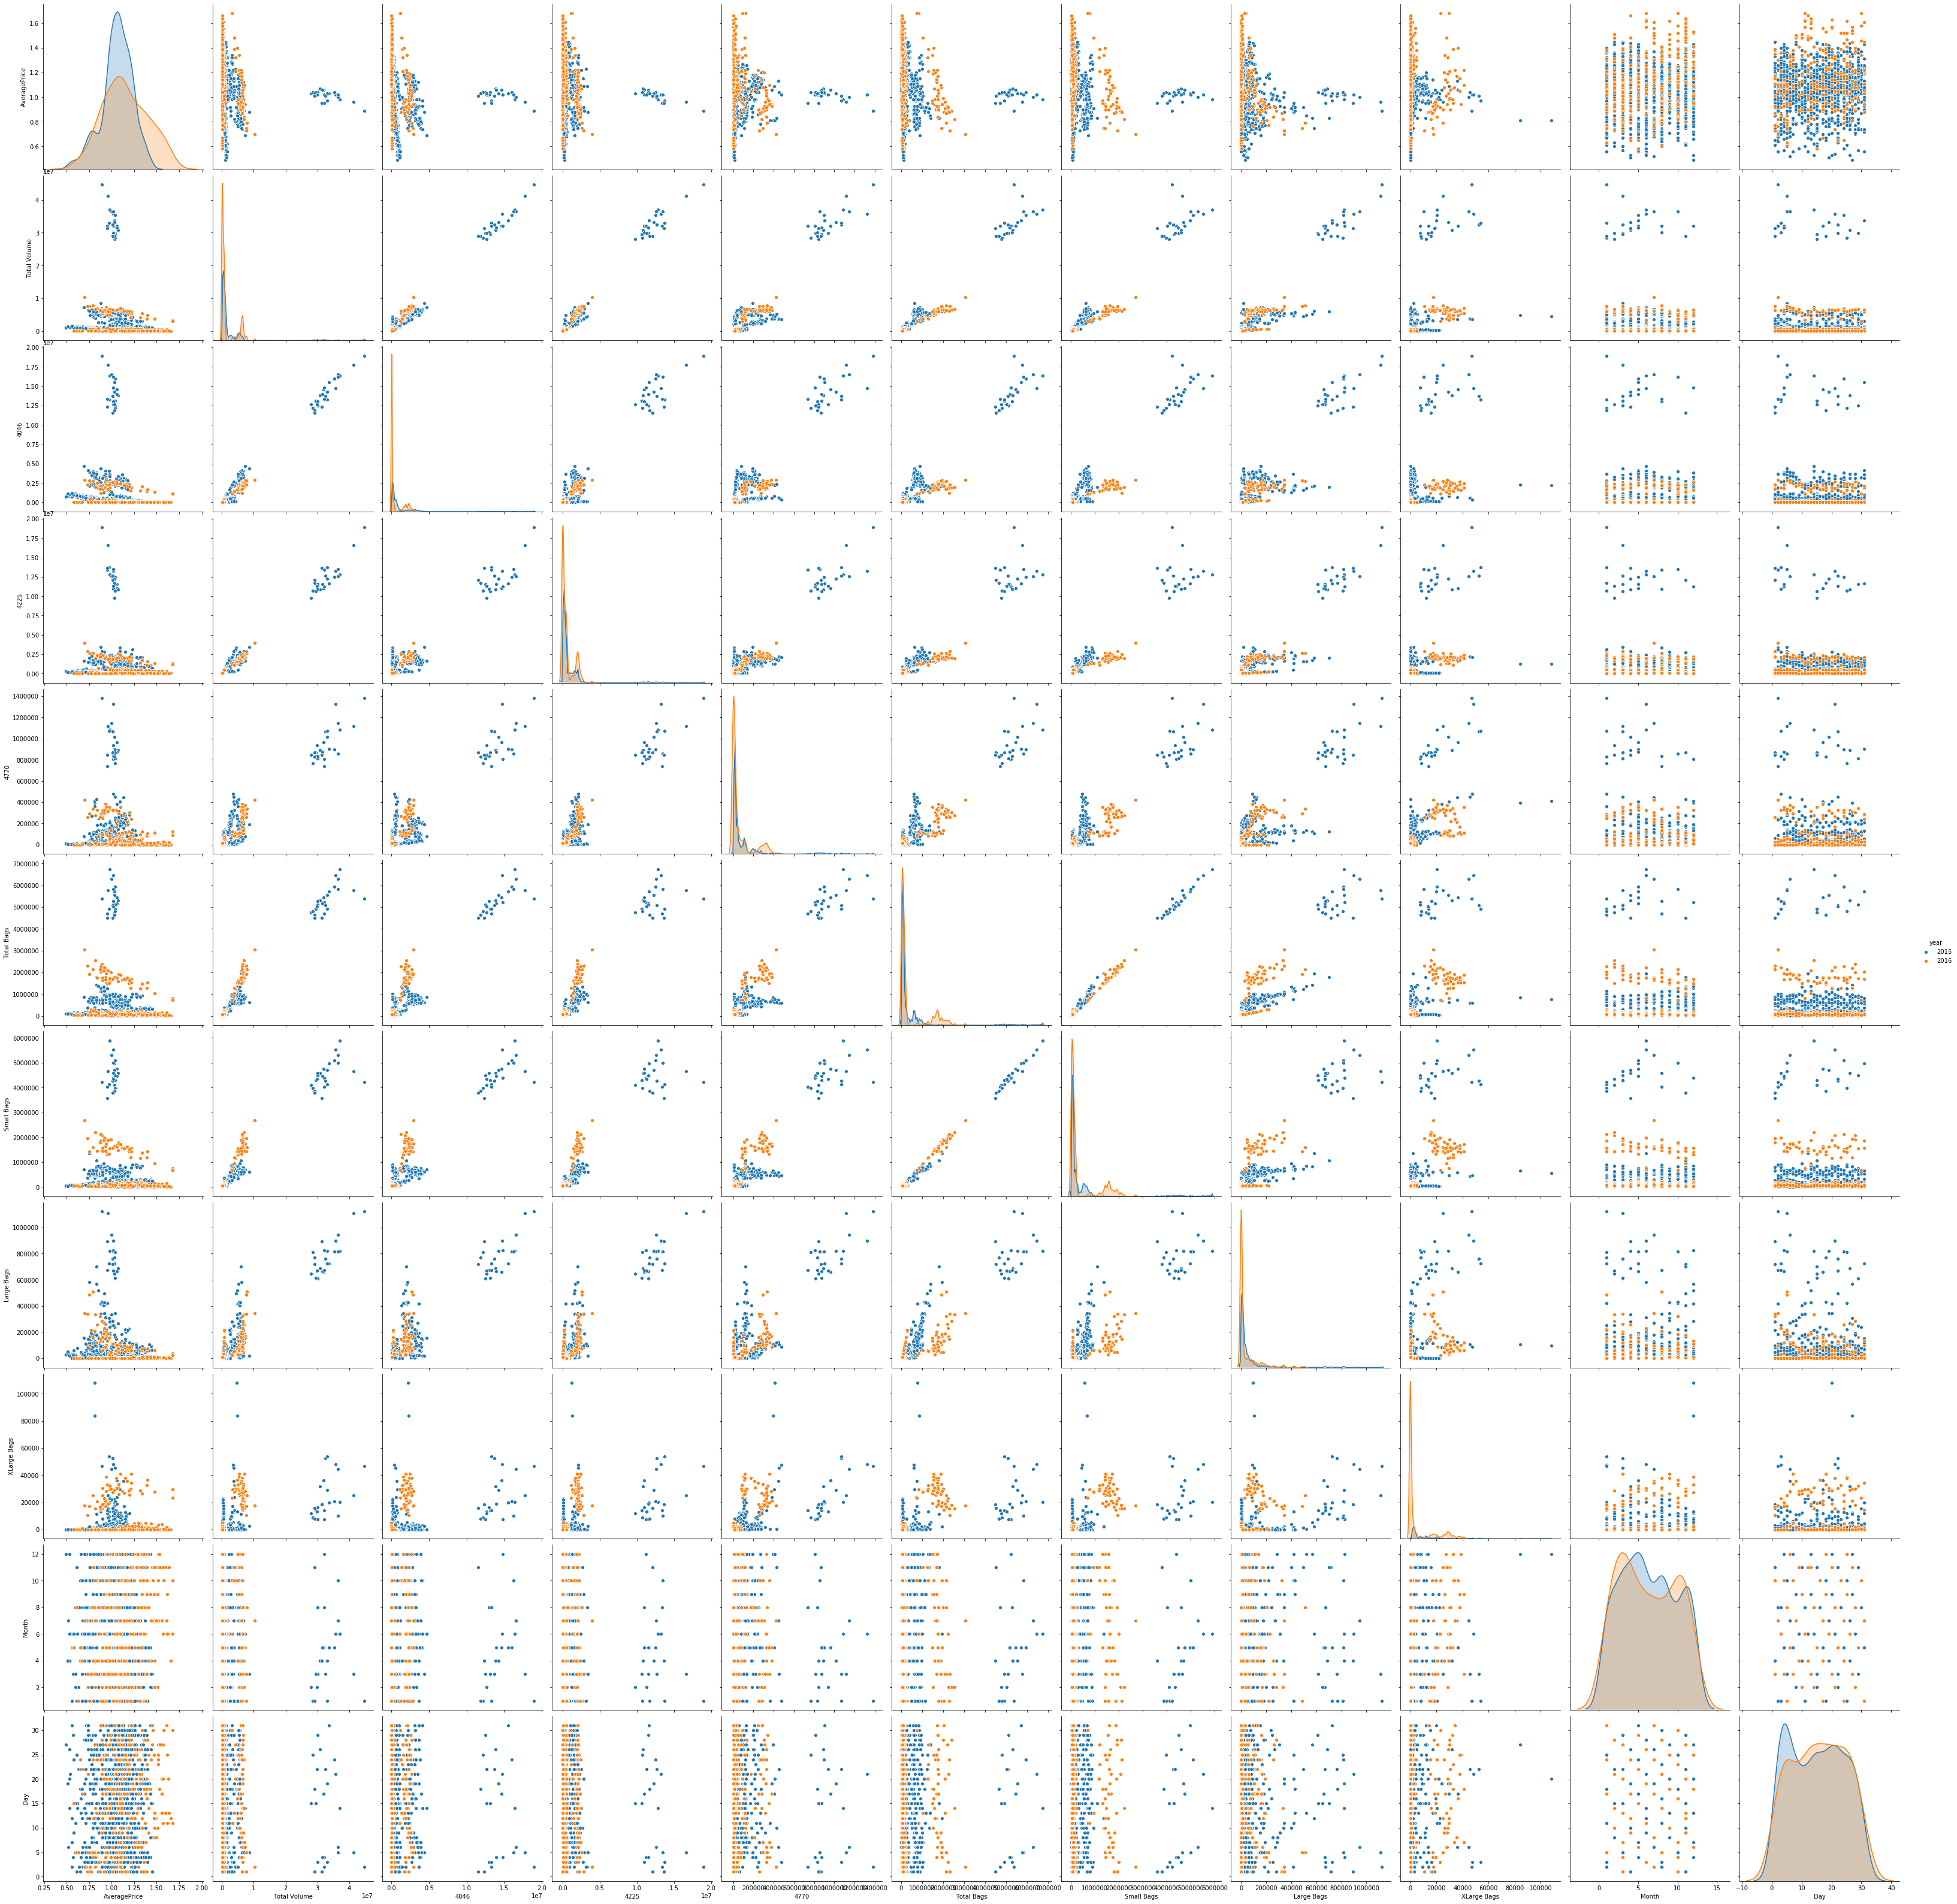

In [289]:
sns.pairplot(av,'year',size=4)
plt.show()

In [290]:
am=av.drop(columns=['Date','region'])

In [291]:
am.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [292]:
x=am.iloc[:,1:]

In [293]:
x.tail()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,10,16
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,9,10
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,2,10
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,9,25
1516,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,2016,9,18


In [294]:
y=pd.DataFrame(am['AveragePrice'])

In [295]:
y.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [296]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.34696593, -0.33149016, -0.33305294, ..., -0.44100815,
         1.62415427,  1.31052998],
       [-0.34907791, -0.33167633, -0.33892254, ..., -0.44100815,
         1.62415427,  0.52953678],
       [-0.33478463, -0.33161448, -0.30034767, ..., -0.44100815,
         1.62415427, -0.25145642],
       ...,
       [-0.32120275, -0.30820887, -0.33398664, ...,  2.26753179,
        -1.25685839, -0.58616779],
       [-0.31878364, -0.30423037, -0.33356795, ...,  2.26753179,
         0.75985047,  1.08738906],
       [-0.3201721 , -0.30987728, -0.33320927, ...,  2.26753179,
         0.75985047,  0.30639586]])

In [297]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
max_r_score=0
for r_state in range (42,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 scoring corresponding to',final_r_state,'is',max_r_score)

max r2 scoring corresponding to 182 is 0.23977675973729407


In [298]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1213, 11) (304, 11)
(1213, 1) (304, 1)


In [299]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2')
a_score

array([-0.07382386,  0.1705287 ,  0.13781229,  0.05156636, -0.19661051,
       -0.19852857, -0.1152915 , -3.52269205, -0.19686374, -0.76932252])

In [300]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=182,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [301]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMSE: 0.16719811078650576
R2 score: 0.23977675973729407
MAE: 0.1271822112113457
MSE: 0.027955208250576652


In [302]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)
print('MAE:',mean_absolute_error(y_test, pred))
print('MSE:',mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MAE: 0.06372467105263159
MSE: 0.007420374769736843
RMSE: 0.08614159720911171


In [303]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.06150346893926939

In [304]:
ls.coef_

array([-0.        , -0.02444338,  0.        ,  0.        ,  0.        ,
        0.        , -0.00017466, -0.        ,  0.02133095,  0.        ,
        0.00473082])

In [305]:
rd=Ridge(alpha=0.01)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.1648077049917248

In [306]:
rd.coef_

array([[-0.00566439, -0.17325298,  0.18143437,  0.00828433,  0.01009884,
         0.02404664, -0.06583821, -0.01768298,  0.02474626,  0.00914383,
         0.0158544 ]])

In [307]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.0


array([-0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.])

In [308]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=250,random_state=182)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8005676091170103


In [309]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=250,random_state=182)
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(r2_score(y_test,gb_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7898752908872656


In [310]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=250,random_state=182)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(r2_score(y_test,ad_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6567082272340561


In these three regressors i will choose random forest regressor

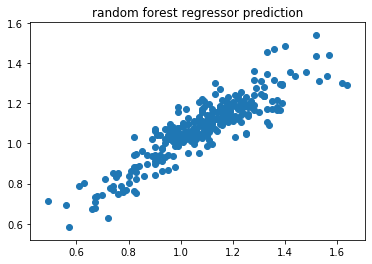

In [311]:
print(plt.scatter(x=y_test,y=predrf))
plt.title('random forest regressor prediction')
plt.show()

In [351]:
#prediction result
t=np.array([178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2020,9,10])

In [352]:
t.shape

(11,)

In [353]:
t=t.reshape(1,-1)

In [354]:
rf.predict(t)

array([0.93008])

In [355]:
#HERE AVERAGE PRICE IS 0.93 PER AVACADO PREDICTED

classification model based on averageprice 

In [317]:
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29


In [318]:
X=av.drop(columns=['Date','region'])
X.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [319]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [320]:
label=le.fit_transform(av['region'])
le.classes_

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [321]:
av.drop(columns=['region'])

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,10,16
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,9,10
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,2,10
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,9,25


In [322]:
av['region']=label
av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7,10,16
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7,9,10
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7,2,10
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7,9,25


In [323]:
Y=av['region']
Y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [324]:
print(X.shape,Y.shape)

(1517, 12) (1517,)


In [325]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 1.35048079, -0.34696593, -0.33149016, ..., -0.44100815,
         1.62415427,  1.31052998],
       [ 1.45639674, -0.34907791, -0.33167633, ..., -0.44100815,
         1.62415427,  0.52953678],
       [-0.76783831, -0.33478463, -0.33161448, ..., -0.44100815,
         1.62415427, -0.25145642],
       ...,
       [ 2.14485045, -0.32120275, -0.30820887, ...,  2.26753179,
        -1.25685839, -0.58616779],
       [ 2.09189247, -0.31878364, -0.30423037, ...,  2.26753179,
         0.75985047,  1.08738906],
       [ 1.88006056, -0.3201721 , -0.30987728, ...,  2.26753179,
         0.75985047,  0.30639586]])

In [326]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [327]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=50,test_size=0.30)

In [328]:
print(X_train.shape,X_test.shape)

(1061, 12) (456, 12)


In [329]:
print(Y_train.shape,Y_test.shape)

(1061,) (456,)


In [330]:
lg=LogisticRegression()

In [331]:
lg.fit(X_train,Y_train)
pred=lg.predict(X_test)
print('Accuracy score:',accuracy_score(Y_test,pred))
print('confusion matrix:',confusion_matrix(Y_test,pred))
print('classification report:',classification_report(Y_test,pred))

Accuracy score: 0.43201754385964913
confusion matrix: [[ 8  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  3]]
classification report:               precision    recall  f1-score   support

           0       0.13      0.33      0.19        24
           1       0.36      0.62      0.46        13
           2       0.41      0.61      0.49        18
           3       0.50      0.82      0.62        17
           4       0.63      0.55      0.59        22
           5       0.45      0.53      0.49        17
           6       1.00      0.95      0.98        22
           7       0.00      0.00      0.00        11
           8       0.78      0.78      0.78         9
           9       0.32      0.33      0.32        18
          10       0.00      0.00      0.00         6
          11       0.50      0.38      0.43         8
          12       0.58      0.88      0.70         8
          

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [332]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]


for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(Y_test,predm))
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.8662280701754386
[[20  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  9]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.92      0.92      0.92        13
           2       0.86      1.00      0.92        18
           3       0.94      1.00      0.97        17
           4       0.90      0.82      0.86        22
           5       0.88      0.88      0.88        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [333]:
from sklearn.model_selection import cross_val_score

In [334]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.82236842 0.82236842 0.83552632 0.90131579 0.84868421 0.88815789
 0.90789474 0.86092715 0.8410596  0.86092715]
0.8589229696758454
0.02949899154695951


In [335]:
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)
print('Accuracy score:',accuracy_score(Y_test,pred))
print('confusion matrix:',confusion_matrix(Y_test,pred))
print('classification report:',classification_report(Y_test,pred))

Accuracy score: 0.8706140350877193
confusion matrix: [[21  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  8]]
classification report:               precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.92      0.92      0.92        13
           2       0.82      1.00      0.90        18
           3       0.94      1.00      0.97        17
           4       0.90      0.82      0.86        22
           5       0.93      0.82      0.87        17
           6       0.95      0.91      0.93        22
           7       0.91      0.91      0.91        11
           8       1.00      0.67      0.80         9
           9       1.00      0.83      0.91        18
          10       0.86      1.00      0.92         6
          11       0.88      0.88      0.88         8
          12       0.80      1.00      0.89         8
          1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


HERE I CHOOSE DECESION TREE CLASSIFIER

In [336]:
#prediction result
t=np.array([1.52,178235.75,43325.87,52198.61,9491.57,64300.70,44704.14,8586.56,0.00,2020,9,10])

In [337]:
t.shape

(12,)

In [338]:
t=t.reshape(1,-1)
t.shape

(1, 12)

In [339]:
dtc.predict(t)

array([48])

48-means tampa region which predicts based on average price

In [340]:
#saving the model
from joblib import dump,load
dump(av,'Avocado_project.joblib')

['Avocado_project.joblib']